Netflix is known for its work in data science, Al, and ML, particularly for building strong
recommendation models and algorithms that understand customer behavior and patterns.
Suppose you are working in a data-driven job role, and you have a dataset of more than
9,000 movies. You need to solve the following questions to help the company make
informed business decisions accordingly.
1) What is the most frequent genre of movies released on Netflix?
2) What genres has highest votes?
3) What movie got the highest popularity? what's its genre?
4) What movie got the lowest popularity? what's its genre?
5) Which year has the most filmmed movies?

# What is the most frequent genre of movies released on Netflix?

numpy --> Mathematical operation 

Pandas --> Data Cleaning 

matplotlib --> Visualization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')

In [6]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [10]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [12]:
#checking duplicate 
df.duplicated().sum()

0

In [14]:
#performing basic statistics
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [16]:
# deleting unwanted columns from the dataset
df.drop(['Overview','Original_Language','Poster_Url'],axis=1,inplace=True)

In [18]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [20]:
# Changing the data type of Release_Date 
df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtype)

datetime64[ns]


In [22]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

# Lebeling movies according to rating 
categorizing vote_average column 

In [24]:
#user defined functions 
def categorize_col(df,col,labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col]=pd.cut(df[col],edges, labels = labels,duplicates = 'drop')
    return df 

In [26]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [28]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [30]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

# Removing duplicates or Null Values from the Vote_Average column

In [32]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [34]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


# Spliting the genres into a list and then explode our dataframe to have only on genre per row for each movie 

In [36]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index()
df.head()

,index,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,1,2022,The Batman,3827.658,1151,popular,Crime
4,1,2022,The Batman,3827.658,1151,popular,Mystery


In [38]:
df.head()

,index,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,1,2022,The Batman,3827.658,1151,popular,Crime
4,1,2022,The Batman,3827.658,1151,popular,Mystery


# Casting Column into Category

In [40]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   index         25552 non-null  int64   
 1   Release_Date  25552 non-null  int32   
 2   Title         25552 non-null  object  
 3   Popularity    25552 non-null  float64 
 4   Vote_Count    25552 non-null  int64   
 5   Vote_Average  25552 non-null  category
 6   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(2), object(1)
memory usage: 949.2+ KB


In [44]:
df.nunique()

index           9727
Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Data Visualization

# What is the most frequent genre of movies released on netflix

In [46]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

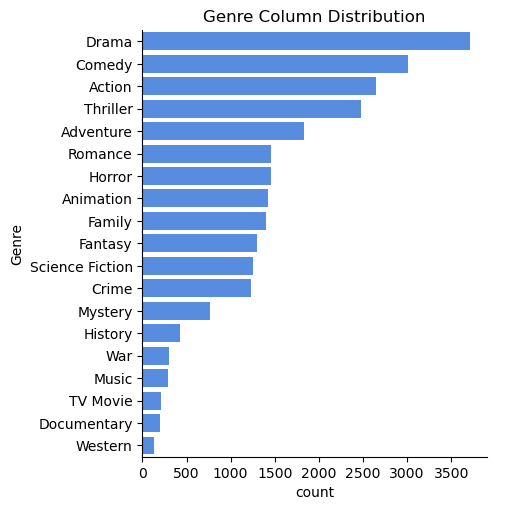

In [48]:
sns.catplot(y='Genre',data=df, kind= 'count',
            order = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title('Genre Column Distribution')
plt.show()

# Which has the Highest Votes in Vot avg column?

In [50]:
df.head()

,index,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,1,2022,The Batman,3827.658,1151,popular,Crime
4,1,2022,The Batman,3827.658,1151,popular,Mystery


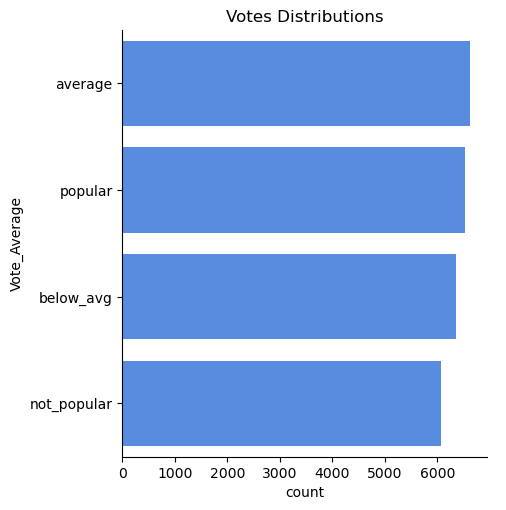

In [52]:
sns.catplot(y ='Vote_Average', data = df, kind= 'count',
            order = df['Vote_Average'].value_counts().index,
            color = '#4287f5')
plt.title('Votes Distributions')
plt.show()

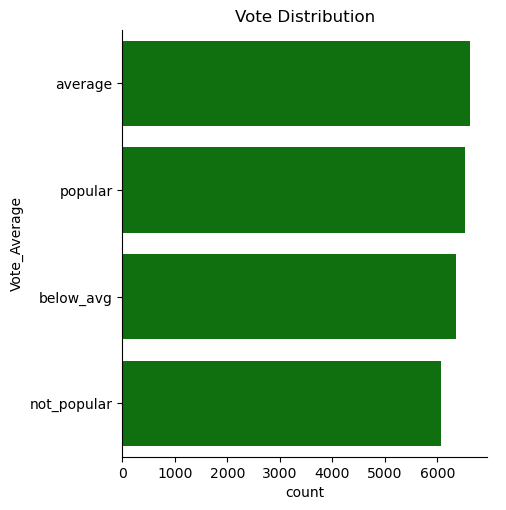

In [58]:
sns.catplot(y ='Vote_Average', data =df, kind='count',
            order = df['Vote_Average'].value_counts().index,
            color = 'green')
plt.title('Vote Distribution')
plt.show()

# What movie got the highest popularity? what's its genre

In [54]:
df[df['Popularity'] == df['Popularity'].max()]

,index,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# What movie got the lowest popularity? What's its genre?

In [56]:
df[df['Popularity']==df['Popularity'].min()]

,index,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,9825,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,9825,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,9825,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,9826,1984,Threads,13.354,186,popular,War
25550,9826,1984,Threads,13.354,186,popular,Drama
25551,9826,1984,Threads,13.354,186,popular,Science Fiction


# Which year has the most filmmed movies?

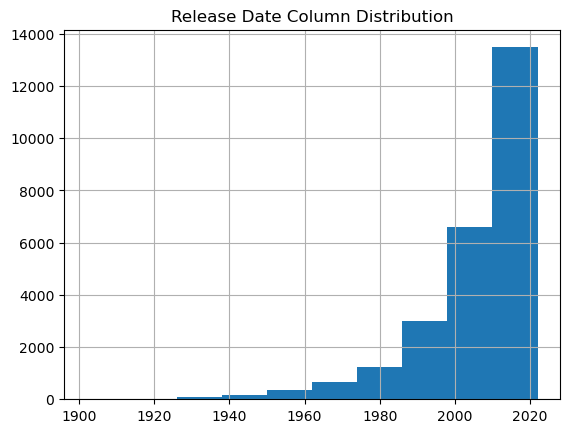

In [58]:
df['Release_Date'].hist()
plt.title('Release Date Column Distribution')
plt.show()

# Summery

# Conclusion# 
Q): What is the most frequent genre in the dataset

?
Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genre

s# .)Q2: What genres has highest vot

es?
we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movpopularity
e# s )
Q3: What movie got the highest popularity? what's its g

enre?
Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Sience Fi

c# t4)n.
Q3: What movie got the lowest popularity? what's its

 genre?
The united states, thread' has the highest lowest rate in our dataset and it has genres of music, drama, 'war', 'etc.

 # a5) his
Q4: Which year has the most filmme

 movies?J
year 2020 has the highest filmming rate in our dataset.